PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Práctica 1

##Introducción

Esta es la primera práctica del segundo laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo priemro que debemos hacer es cargar y leer la base de datos:

In [61]:
#!pip install mlxtend==0.13.0

In [62]:
#Importar librerías
#!apt install mlxtend
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
#from mlxtend.frequent_patterns import apriori
#from apyori import apriori #apriori
from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori, association_rules
#from mlxtend.frequent_patterns import frequent_patterns
#from mlxtend import frequent_patterns
#from mlxtend.frequent_patterns import frequent_patterns

#Importamos la base de datos
df = pd.read_csv('BlackFriday.csv',sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


----------------

----------------

Subimos la base de datos, df.info nos aporta la infomación que contiene la base de datos, vemos el tipo, la cantidad de las variables con las que trabajamos... y .head vamos a ver que forma tiene la base de datos y las primeras filas de esta.

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 

##Comprensión de los negocios y definición del problema

La librería se usará de la siguiente manera:
1) Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el
soporte de los itemset. Por lo tanto, se tendrá que usar un método que dado un itemset devuelva su
soporte.

2) Para k≥2.
a. Mostrar los itemset frecuentes candidatos y su soporte.

3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.

5) Listar todas las reglas que sean de alta confianza.

6) Usar los siguientes métodos. Dado un antecesor, devolver todas las reglas que contengan a dicho
antecesor. Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

7) Utiliza las representaciones gráficas que consideres adecuadas para representar las reglas obtenidas
y obtener conclusiones a partir de los datos.

A partir de lo anterior de pide:
- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
- ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos 
- ¿Qué tipo reglas desaparecen según la configuración y categorías (género, edad y tipo de producto)
consideradas? ¿Por qué? 
- Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado interesantes
obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y
min_threshold. Justifica los resultados. 
- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos 

## Comprensión de los datos

La base de datos que utilizaremos consta de 233599 observaciones. Teniendo en ceunta que el trabajo que vamos a realizar, utilizanod el algoritmo apriori, queremos sacar regalas y con todos estos datos, lo que nos hace pensar es que vamos a encontrar muchísimas reglas a partir de estos datos.

La clave está en cuales son las que más nos interesan, basandonos en su confianza, y una vez hallado esto debemos tomar decisiones para que usando estas reglas vendamos el mayor número de producto, para aumentar nuestras gananzas.

Existen 11 tipos de atributos distintos: 

- User_ID: número para identificar al usuario.
- Product_ID: número para identificar el producto.
- Gender: Género del comprador.	
- Age: Edad del comprador.
- Occupation: A lo que se dedica el comprador, ya pasasdo a categórica.
- City_Category: Categoría de la ciudad donde reside el user.
- Stay_In_Current_City_Years: El tiempo que lleva en la ciudad.
- Marital_Status: Estado civil.
- Product_Category_1: La categoría principal del producto.
- Product_Category_2: Siguente categoría.
- Product_Category_3: Última categoría del producto.



##Preparación de los datos

Se procede a estudiar la cantidad de NaN por cada atributo.

In [63]:
usernan = df['User_ID'].isna().sum()
print(f"La cantidad de NaN que existen en la variable User_ID es:{usernan}")
productnan = df['Product_ID'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_ID es:{productnan}")
gendernan = df['Gender'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Gender es:{gendernan}")
agenan = df['Age'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Age es:{agenan}")
ocupationan = df['Occupation'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Occupation es:{ocupationan}")
City_Categorynan = df['City_Category'].isna().sum()
print(f"La cantidad de NaN que existen en la variable City_Category es:{City_Categorynan}")
Stay_In_Current_City_Yearsnan = df['Stay_In_Current_City_Years'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Stay_In_Current_City_Years es:{Stay_In_Current_City_Yearsnan}")
Marital_Statusnan = df['Marital_Status'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Marital_Status es:{Marital_Statusnan}")
Product_Category_1nan = df['Product_Category_1'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_1 es:{Product_Category_1nan}")
Product_Category_2nan = df['Product_Category_2'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_2 es:{Product_Category_2nan}")
Product_Category_3nan = df['Product_Category_3'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_3 es:{Product_Category_3nan}")

La cantidad de NaN que existen en la variable User_ID es:0
La cantidad de NaN que existen en la variable Product_ID es:0
La cantidad de NaN que existen en la variable Gender es:0
La cantidad de NaN que existen en la variable Age es:0
La cantidad de NaN que existen en la variable Occupation es:0
La cantidad de NaN que existen en la variable City_Category es:0
La cantidad de NaN que existen en la variable Stay_In_Current_City_Years es:0
La cantidad de NaN que existen en la variable Marital_Status es:0
La cantidad de NaN que existen en la variable Product_Category_1 es:0
La cantidad de NaN que existen en la variable Product_Category_2 es:72344
La cantidad de NaN que existen en la variable Product_Category_3 es:162562


Se observa que en Product_Category_2 y Product_Category_3, el número de NaN es elevado. Esto es porque los productos puede que no tengan segunda o tercera clasificación. 
Para lidiar con la falta de datos, se rellenan con 0, ya que no hay ninguna categoría que sea representado con este número. Se ha considerado eliminar los registros que tienen  NaN, pero estaríamos eliminando por tanto posibles reglas de aquellos productos que sí que tienen categoría 1. 

In [64]:
# Rellenamos los valores na con 0, ya que no tiene categoría
df = df.fillna(0)

# Quitamos los duplicados
df = df.drop_duplicates()

##Modelado

En este proceso de la metodología Crisp-DM vamos a modelar los datos de manera que puedan ser tratados de manera correcta por la técnica de data mining seleccionada. 
Para ello, vamos a agrupar los datos por atributos en función de User_ID y Product_Category_1, para poder identificar la compra y atributos de cada usuario. 

Una transacción se considera un usuario, en la cual se recopila información sobre: 
-  La identificación del producto
-  Género del cliente 
-  Edad 
-  Ocupación 
-  Ciudad de residencia
-  Años viviendo en la ciudad
-  Estado civil 
-  Categoría 1 del producto
-  Categoría 2 del producto
-  Categoría 3 del producto

De esta manera se podrán obtener reglas eficientes que definan modelos con mayor confianza con el fin de optimizar la venta de productos en el Black Friday.  

Otro de los motivos por lo que los datos se han agrupado, es por la correcta interpretación de las reglas, ya que si no se agrupan, no se podrán identificar posibles reglas, porque las compras se consideran de un sólo producto, y no se podrían hacer posibles relaciones de ocurrencia entre ellos. 

In [65]:
df_User_Product = (df
        .groupby(['User_ID', 'Product_ID'])['Product_Category_1']
        .sum()
        .apply(lambda x:x>0)
        .unstack()
        .fillna(False)
        .reset_index()
        .set_index('User_ID')
          )

In [66]:
df_Gender = (df
            .groupby(['User_ID','Gender'])['Product_Category_1']
            .sum()
            .apply(lambda x: x>0)
            .unstack()
            .fillna(False)
            .reset_index()
            .set_index('User_ID')
)

In [67]:
df_Age = (df
        .groupby(['User_ID','Age'])['Product_Category_1']
        .sum()
        .apply(lambda x: x>0)
        .unstack()
        .fillna(False)
        .reset_index()
        .set_index('User_ID')
)

In [68]:
df_Occupation = (df
                .groupby(['User_ID','Occupation'])['Product_Category_1']
                .sum()
                .apply(lambda x: x>0)
                .unstack()
                .fillna(False)
                .reset_index()
                .set_index('User_ID')
)

In [69]:
df_City = (df
          .groupby(['User_ID','City_Category'])['Product_Category_1']
          .sum()
          .apply(lambda x: x>0)
          .unstack()
          .fillna(False)
          .reset_index()
          .set_index('User_ID')
)

In [70]:
df_Stay = (df
           .groupby(['User_ID','Stay_In_Current_City_Years'])['Product_Category_1']
           .sum()
           .apply(lambda x: x>0)
           .unstack()
           .fillna(False)
           .reset_index()
           .set_index('User_ID')
)

In [71]:
df_Marital = (df
              .groupby(['User_ID','Marital_Status'])['Product_Category_1']
              .sum()
              .apply(lambda x: x>0)
              .unstack()
              .fillna(False)
              .reset_index()
              .set_index('User_ID')
)

In [72]:
df_Product_Category_1 = (df
                         .groupby(['User_ID','Product_Category_1'])['Product_Category_2']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

In [73]:
df_Product_Category_2 = (df
                         .groupby(['User_ID','Product_Category_2'])['Product_Category_1']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

In [74]:
df_Product_Category_3 = (df
                         .groupby(['User_ID','Product_Category_3'])['Product_Category_1']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

Después de realizar la agrupación los nombres de los atributos eran nombres no identificables, ya que aparecía un 1, y no se sabía a qué valor de atributo corresponde. Es por ello que para solucionarlo, se han renombrado para poder identificarlos como facilidad. 




In [75]:
df_Product_Category_1=df_Product_Category_1.set_axis(['1_PC1','2_PC1','3_PC1','4_PC1','5_PC1','6_PC1','7_PC1','8_PC1','9_PC1','10_PC1','11_PC1','12_PC1','13_PC1','14_PC1','15_PC1','16_PC1','17_PC1','18_PC1'], axis=1)

In [76]:
df_Product_Category_2=df_Product_Category_2.set_axis(['0_PC2','2_PC2','3_PC2','4_PC2','5_PC2','6_PC2','7_PC2','8_PC2','9_PC2','10_PC2','11_PC2','12_PC2','13_PC2','14_PC2','15_PC2','16_PC2','17_PC2','18_PC2'], axis=1)

In [77]:
df_Product_Category_3=df_Product_Category_3.set_axis(['0_PC3','3_PC3','4_PC3','5_PC3','6_PC3','8_PC3','9_PC3','10_PC3','11_PC3','12_PC3','13_PC3','14_PC3','15_PC3','16_PC3','17_PC3','18_PC3'],axis=1)

In [78]:
df_Marital=df_Marital.set_axis(['0_Marital', '1_Marital'], axis=1)

In [79]:
df_Occupation=df_Occupation.set_axis(['0_Occ','1_Occ', '2_Occ', '3_Occ', '4_Occ', '5_Occ', '6_Occ', '7_Occ', '8_Occ', '9_Occ', '10_Occ', '11_Occ', '12_Occ', '13_Occ', '14_Occ', '15_Occ', '16_Occ', '17_Occ', '18_Occ', '19_Occ', '20_Occ'], axis=1)

In [80]:
df_Stay=df_Stay.set_axis(['0_Stay','1_Stay','2_Stay','3_Stay','4+_Stay'],axis=1)

Concatenamos las agrupaciones creando una nueva base de datos llamada 'data'.

In [81]:
data = pd.concat([df_User_Product, df_Occupation, df_City, df_Stay, df_Marital, df_Product_Category_1, df_Product_Category_2, df_Product_Category_3, df_Age, df_Gender], axis = 1)
data

,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,18_PC3,0-17,18-25,26-35,36-45,46-50,51-55,55+,F,M
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1000002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1000003,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
1000004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1000005,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
1006037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1006038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


Una vez creada la base de datos, y aplicado el one-hot enconding con False y True aplicamos el método apriori con un soporte de 0.5:

In [82]:
frequent_itemsets = apriori(data, min_support=0.5, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.532847                                                (C)
1    0.580037                                        (0_Marital)
2    0.905958                                            (1_PC1)
3    0.536581                                            (2_PC1)
4    0.852996                                            (5_PC1)
..        ...                                                ...
754  0.511119       (0_PC3, 5_PC1, 16_PC2, 8_PC2, 14_PC2, 0_PC2)
755  0.506196  (0_PC3, 5_PC1, 8_PC2, 8_PC1, 0_PC2, 2_PC2, 1_PC1)
756  0.539467  (0_PC3, 5_PC1, 8_PC2, 8_PC1, 14_PC2, 0_PC2, 1_...
757  0.508403  (0_PC3, 5_PC1, 16_PC2, 8_PC2, 8_PC1, 0_PC2, 1_...
758  0.512137  (0_PC3, 5_PC1, 8_PC2, 14_PC2, 0_PC2, 2_PC2, 1_...

[759 rows x 2 columns]


A continuación se diferencias las longitudes de itemsets frecuentes, e imprimimos la primera longitud.

In [83]:
#Para k=1

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets1=frequent_itemsets[frequent_itemsets['length'] == 1]
frequent_itemsets1

,support,itemsets,length
0,0.532847,(C),1
1,0.580037,(0_Marital),1
2,0.905958,(1_PC1),1
3,0.536581,(2_PC1),1
4,0.852996,(5_PC1),1
5,0.521643,(6_PC1),1
6,0.767951,(8_PC1),1
7,0.944152,(0_PC2),1
8,0.729588,(2_PC2),1
9,0.527075,(4_PC2),1


Tal y como se plantea, se muestra para cada longitud, los itemsets frecuentes, hasta que no se generen nuevos es decir, hasta alcanzar su máxima longitud. 

In [84]:
i=2
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
while i <= max(frequent_itemsets['length']):
  print(frequent_itemsets[frequent_itemsets['length'] == i]) 
  i=i+1

      support            itemsets  length
23   0.531149          (0_PC3, C)       2
24   0.527245  (1_PC1, 0_Marital)       2
25   0.546936  (0_PC2, 0_Marital)       2
26   0.578679  (0_PC3, 0_Marital)       2
27   0.516551      (1_PC1, 2_PC1)       2
..        ...                 ...     ...
125  0.564420     (0_PC3, 15_PC3)       2
126  0.669496     (16_PC3, 0_PC3)       2
127  0.556782     (17_PC3, 0_PC3)       2
128  0.715498          (0_PC3, M)       2
129  0.503650         (16_PC3, M)       2

[107 rows x 3 columns]
      support                   itemsets  length
130  0.526226  (1_PC1, 0_PC3, 0_Marital)       3
131  0.546936  (0_PC2, 0_PC3, 0_Marital)       3
132  0.500934      (1_PC1, 0_PC2, 2_PC1)       3
133  0.516041      (1_PC1, 0_PC3, 2_PC1)       3
134  0.647938      (1_PC1, 5_PC1, 8_PC1)       3
..        ...                        ...     ...
336  0.544050    (16_PC3, 0_PC3, 15_PC2)       3
337  0.504838         (0_PC3, 15_PC2, M)       3
338  0.553217    (16_PC3, 16_PC

Observamos que se crean cadenas de items de longitud 7 con un soporte mayor que 0.5. 

Lo próximo es calcular todas las posibles reglas, evaluando así la confianza de cada una. Pero para ello primero se debe hacer un proceso de limpieza, ya que anteriormente se reemplazaron las categorías de los productos con NaN's por 0's. No se desea que estos 0's produzcan reglas de asociación, ya que en verdad, son inexistentes, no implican ninguna información útil. 

Los borramos así de los itemsets frecuentes: 

In [85]:
frequents_with_zero=frequent_itemsets['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets['itemsets'].apply(lambda x: '0_PC3' in x)



In [86]:
frequent_itemsets = frequent_itemsets.drop(frequent_itemsets[frequents_with_zero].index)

Una vez realizado, se procede a calcular la confianza de todas las reglas, sin umbral mínimo: 

In [87]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_PC1),(0_Marital),0.905958,0.580037,0.527245,0.581975,1.003340,0.001755,1.004635
1,(0_Marital),(1_PC1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
2,(1_PC1),(2_PC1),0.905958,0.536581,0.516551,0.570171,1.062599,0.030430,1.078146
3,(2_PC1),(1_PC1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
4,(1_PC1),(5_PC1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
...,...,...,...,...,...,...,...,...,...
1265,(5_PC1),"(1_PC1, 16_PC2, 8_PC2, 14_PC2)",0.852996,0.525378,0.503819,0.590647,1.124233,0.055674,1.159444
1266,(16_PC2),"(1_PC1, 8_PC2, 5_PC1, 14_PC2)",0.723986,0.607707,0.503819,0.695897,1.145120,0.063848,1.290001
1267,(8_PC2),"(1_PC1, 16_PC2, 5_PC1, 14_PC2)",0.830929,0.533186,0.503819,0.606333,1.137188,0.060780,1.185809
1268,(14_PC2),"(1_PC1, 16_PC2, 8_PC2, 5_PC1)",0.757936,0.567306,0.503819,0.664726,1.171723,0.073838,1.290567


Ahora mostramos aquellas reglas que sean de alta confianza. El criterio para ello es que el umbral mínimo sea de 0.95, es decir, la implicación del antecedente, tiende a la ocurrencia del consecuente.
Además, modificando el umbral mínimo, se van a devolver todas las reglas que cumplan con dicha confianza.

In [88]:
rulesaltaconfianza = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.95)
rulesaltaconfianza

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_PC1),(1_PC1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
1,(2_PC2),(1_PC1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
2,(4_PC2),(1_PC1),0.527075,0.905958,0.500934,0.950403,1.049058,0.023426,1.896102
3,(5_PC2),(1_PC1),0.592938,0.905958,0.571550,0.963928,1.063987,0.034372,2.607047
4,(6_PC2),(1_PC1),0.516890,0.905958,0.502971,0.973071,1.074079,0.034690,3.492160
...,...,...,...,...,...,...,...,...,...
87,"(2_PC2, 8_PC2, 5_PC1, 14_PC2)",(1_PC1),0.518757,0.905958,0.518757,1.000000,1.103804,0.048785,inf
88,"(1_PC1, 8_PC2, 2_PC2, 14_PC2)",(5_PC1),0.537430,0.852996,0.518757,0.965256,1.131606,0.060332,4.231040
89,"(8_PC2, 2_PC2, 14_PC2)","(1_PC1, 5_PC1)",0.537430,0.781531,0.518757,0.965256,1.235083,0.098739,6.287931
90,"(16_PC2, 8_PC2, 5_PC1, 14_PC2)",(1_PC1),0.516551,0.905958,0.503819,0.975353,1.076598,0.035846,3.815588


Dado un antecedente, se desea que se muestren todas las reglas que lo contengan. Pongamonos en el suceso de que queremos hacer una comparación de sexo, para ello imprimimos todas aquellas reglas cuyo antecedente, contenga sexo masculino, y luego femenino.

In [116]:
print(rules[rules['antecedents'].apply(lambda x: 'M' in x)])


           antecedents            consequents  antecedent support  \
35                 (M)                (1_PC1)            0.717196   
59                 (M)                (5_PC1)            0.717196   
73                 (M)                (8_PC1)            0.717196   
89                 (M)                (2_PC2)            0.717196   
109                (M)                (8_PC2)            0.717196   
117                (M)               (14_PC2)            0.717196   
123                (M)               (15_PC2)            0.717196   
127                (M)               (16_PC2)            0.717196   
129                (M)               (16_PC3)            0.717196   
185         (1_PC1, M)                (5_PC1)            0.663724   
186         (5_PC1, M)                (1_PC1)            0.608216   
189                (M)         (1_PC1, 5_PC1)            0.717196   
227         (1_PC1, M)                (8_PC1)            0.663724   
228         (8_PC1, M)            

Ahora imprimimos aquellas de sexo femenino: 

In [117]:
print(rules[rules['antecedents'].apply(lambda x: 'F' in x)])

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


Para un soporte de 0.5 encontramos que no hay ninguna regla de asociación que incluya en el antecedente mujeres. De aquí se puede concluir que la información recolectada en esta base de datos se ve mayormente influida por hombres que por mujeres, es decir, se ha recolectado una gran cantidad de información mayor de hombres. En el caso de que esta base de datos sea aleatoria y no se encuentre sesgada, se deduce que el día de black friday, en este comercio, acuden más hombres que mujeres. 

In [127]:
rulesaltaconfianzaplt= [rulesaltaconfianza['antecedents'],rulesaltaconfianza['consequents'], rulesaltaconfianza['support'] ]
rulesaltaconfianzaplt

[0                            (2_PC1)
 1                            (2_PC2)
 2                            (4_PC2)
 3                            (5_PC2)
 4                            (6_PC2)
                    ...              
 87     (2_PC2, 8_PC2, 5_PC1, 14_PC2)
 88     (1_PC1, 8_PC2, 2_PC2, 14_PC2)
 89            (8_PC2, 2_PC2, 14_PC2)
 90    (16_PC2, 8_PC2, 5_PC1, 14_PC2)
 91    (1_PC1, 16_PC2, 8_PC2, 14_PC2)
 Name: antecedents, Length: 92, dtype: object, 0            (1_PC1)
 1            (1_PC1)
 2            (1_PC1)
 3            (1_PC1)
 4            (1_PC1)
            ...      
 87           (1_PC1)
 88           (5_PC1)
 89    (1_PC1, 5_PC1)
 90           (1_PC1)
 91           (5_PC1)
 Name: consequents, Length: 92, dtype: object, 0     0.516551
 1     0.729588
 2     0.500934
 3     0.571550
 4     0.502971
         ...   
 87    0.518757
 88    0.518757
 89    0.518757
 90    0.503819
 91    0.503819
 Name: support, Length: 92, dtype: float64]

In [125]:
import networkx as nx
import matplotlib.pyplot as plt

# Crea un grafo dirigido vacío
G = nx.DiGraph()

#preparamos las reglas para representarlas: 

rulesaltaconfianzaplt= [rulesaltaconfianza['antecedents'],rulesaltaconfianza['consequents'], rulesaltaconfianza['support'] ]

# Agrega nodos y aristas al grafo
for rule in rulesaltaconfianzaplt:
    G.add_edge(rule[0], rule[1], weight=rule[2])

# Establece el diseño del grafo
pos = nx.spring_layout(G)

# Dibuja el grafo con etiquetas de nodo y peso de arista
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=18, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='black')
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

# Muestra el grafo
plt.axis('off')
plt.show()

TypeError: ignored

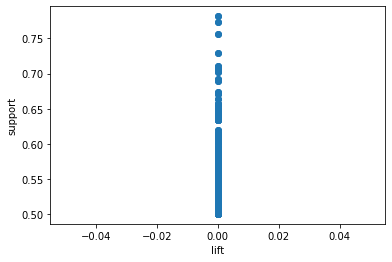

In [122]:
plt.scatter(rules['antecedents']=='M', rules['support'])
plt.xlabel('lift')
plt.ylabel('support')
plt.show()

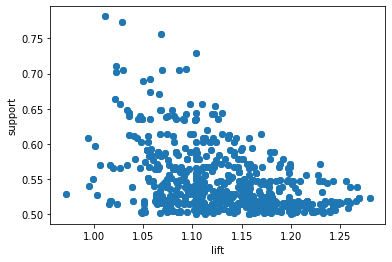

In [94]:
plt.scatter(rules['lift'], rules['support'])
plt.xlabel('lift')
plt.ylabel('support')
plt.show()

In [95]:
#la confianza y soporte tienden a ser directamente proporcionales

In [96]:
min(rules['support'])

0.5002546257002207

##Preguntas 


### 1. Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [97]:
#creo que no hace falta
Age_Range = df_Age.columns.values.tolist()
PC1_Range = df_Product_Category_1.columns.values.tolist()
PC2_Range = df_Product_Category_2.columns.values.tolist()
PC3_Range = df_Product_Category_3.columns.values.tolist()
Gender_Range = df_Gender.columns.values.tolist()
Names_Range=[Age_Range, PC1_Range, PC2_Range, PC3_Range, Gender_Range] 

In [98]:
data1 = pd.concat([df_Product_Category_1, df_Product_Category_2, df_Product_Category_3, df_Age, df_Gender], axis = 1)


In [99]:
frequent_itemsets_40 = apriori(data1, min_support=0.4, use_colnames=True)
frequent_itemsets_60 = apriori(data1, min_support=0.6, use_colnames=True)
frequent_itemsets_80 = apriori(data1, min_support=0.8, use_colnames=True)

In [100]:
frequents_with_zero_40=frequent_itemsets_40['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets_40['itemsets'].apply(lambda x: '0_PC3' in x)
frequent_itemsets_40 = frequent_itemsets_40.drop(frequent_itemsets_40[frequents_with_zero_40].index)
frequents_with_zero_60=frequent_itemsets_60['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets_60['itemsets'].apply(lambda x: '0_PC3' in x)
frequent_itemsets_60 = frequent_itemsets_60.drop(frequent_itemsets_60[frequents_with_zero_60].index)
frequents_with_zero_80=frequent_itemsets_80['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets_80['itemsets'].apply(lambda x: '0_PC3' in x)
frequent_itemsets_80 = frequent_itemsets_80.drop(frequent_itemsets_80[frequents_with_zero_80].index)

In [101]:
rules_40 = association_rules(frequent_itemsets_40, metric='confidence', min_threshold=0.6, support_only=True)
rules_60 = association_rules(frequent_itemsets_60, metric='confidence', min_threshold=0.6, support_only=True)
rules_80 = association_rules(frequent_itemsets_80, metric='confidence', min_threshold=0.6, support_only=True)

In [102]:
len(rules_40)

152

In [103]:
len(rules_60)

152

In [104]:
len(rules_80)

0

In [105]:
#Creo que no hace falta
#for i in range(0,3): #porque son 3 valores de soporte 
#  frequent_itemsets = apriori(data, min_support=0.4+0.2*i, use_colnames=True)
  #rint('Con soporte = ', 0.4 + 0.2*i)
  #for j in Names_Range: 
   # for k in j: 
      #print('Atributo: ', k)
      #frequent_itemsets_1=frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: k in x)]
      #print(frequent_itemsets_1)


### 2. ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos (1 punto) 

### 3. ¿Qué tipo reglas desaparecen según la configuración y categorías (género, edad y tipo de producto)consideradas? ¿Por qué? 

Desaparecen todas aquellas cuyo antecendente o consecuencia contenga una de los atributos no incluidos. 

En cuanto al soporte, las reglas más específicas son aquellas cuyo umbral es menor, ya que incluye más items tanto en el antecedente como en el consecuente. Sin embargo, conseguimos mayor precisión (son más correctas) con un soporte mayor. 

In [106]:
rules_40 = association_rules(frequent_itemsets_40, metric='confidence', min_threshold=0.6, support_only=True)
rules_60 = association_rules(frequent_itemsets_60, metric='confidence', min_threshold=0.6, support_only=True)
rules_80 = association_rules(frequent_itemsets_80, metric='confidence', min_threshold=0.6, support_only=True)

### 4. Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado interesantes obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold. Justifica los resultados.

In [107]:
frequent_itemsets_40_RULES =association_rules(frequent_itemsets_40, metric='lift', min_threshold=1.3)

In [108]:
frequent_itemsets_40_RULES

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(5_PC2),(2_PC1),0.592938,0.536581,0.422169,0.711995,1.326911,0.104010,1.609067
1,(2_PC1),(5_PC2),0.536581,0.592938,0.422169,0.786776,1.326911,0.104010,1.909083
2,(2_PC1),(15_PC3),0.536581,0.565099,0.407062,0.758621,1.342456,0.103840,1.801731
3,(15_PC3),(2_PC1),0.565099,0.536581,0.407062,0.720336,1.342456,0.103840,1.657058
4,(4_PC2),(3_PC1),0.527075,0.485317,0.446953,0.847987,1.747287,0.191155,3.385788
...,...,...,...,...,...,...,...,...,...
4693,"(16_PC3, 8_PC1)","(5_PC1, 16_PC2, 8_PC2, 14_PC2, 1_PC1)",0.564420,0.503819,0.407401,0.721805,1.432665,0.123035,1.783568
4694,"(1_PC1, 8_PC1)","(5_PC1, 16_PC2, 8_PC2, 14_PC2, 16_PC3)",0.711254,0.435070,0.407401,0.572792,1.316551,0.097955,1.322377
4695,"(16_PC3, 14_PC2)","(5_PC1, 16_PC2, 8_PC2, 8_PC1, 1_PC1)",0.554575,0.515193,0.407401,0.734619,1.425911,0.121688,1.826835
4696,"(1_PC1, 14_PC2)","(5_PC1, 16_PC2, 8_PC2, 8_PC1, 16_PC3)",0.701918,0.444916,0.407401,0.580411,1.304541,0.095107,1.322924


In [109]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['antecedents'].apply(lambda x: 'M' in x)])

            antecedents      consequents  antecedent support  \
106          (2_PC2, M)         (15_PC3)            0.551859   
308   (1_PC1, 2_PC2, M)         (15_PC3)            0.551859   
310          (2_PC2, M)  (1_PC1, 15_PC3)            0.551859   
390  (1_PC1, 16_PC3, M)         (15_PC2)            0.491767   
392         (16_PC3, M)  (1_PC1, 15_PC2)            0.503650   

     consequent support   support  confidence      lift  leverage  conviction  
106            0.565099  0.413342    0.749000  1.325431  0.101487    1.732674  
308            0.565099  0.413342    0.749000  1.325431  0.101487    1.732674  
310            0.560007  0.413342    0.749000  1.337484  0.104298    1.752963  
390            0.656765  0.423358    0.860891  1.310805  0.100382    2.467377  
392            0.638432  0.423358    0.840580  1.316633  0.101812    2.268021  


Vemos que para un soporte de 0.4 no hay ni mujeres ni edades, por lo que disminuimos el soporte a 0.3

In [110]:
#frequent_itemsets_40
print(frequent_itemsets_40[frequent_itemsets_40['itemsets'].apply(lambda x: '51-55' in x)])

Empty DataFrame
Columns: [support, itemsets]
Index: []


### 5. - Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos

mejores configuraciones: más lift

Es un sii con el antecedente y consecuencia, aparecen luego dados la vuelta

Repetirse como tal no, pero busca todas las combinaciones posibles para un itemset dado. 

In [111]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['antecedents'].apply(lambda x: 'M' in x)])

            antecedents      consequents  antecedent support  \
106          (2_PC2, M)         (15_PC3)            0.551859   
308   (1_PC1, 2_PC2, M)         (15_PC3)            0.551859   
310          (2_PC2, M)  (1_PC1, 15_PC3)            0.551859   
390  (1_PC1, 16_PC3, M)         (15_PC2)            0.491767   
392         (16_PC3, M)  (1_PC1, 15_PC2)            0.503650   

     consequent support   support  confidence      lift  leverage  conviction  
106            0.565099  0.413342    0.749000  1.325431  0.101487    1.732674  
308            0.565099  0.413342    0.749000  1.325431  0.101487    1.732674  
310            0.560007  0.413342    0.749000  1.337484  0.104298    1.752963  
390            0.656765  0.423358    0.860891  1.310805  0.100382    2.467377  
392            0.638432  0.423358    0.840580  1.316633  0.101812    2.268021  


In [112]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['consequents'].apply(lambda x: 'M' in x)])

         antecedents         consequents  antecedent support  \
107         (15_PC3)          (2_PC2, M)            0.565099   
309  (1_PC1, 15_PC3)          (2_PC2, M)            0.560007   
311         (15_PC3)   (1_PC1, 2_PC2, M)            0.565099   
391  (1_PC1, 15_PC2)         (16_PC3, M)            0.638432   
393         (15_PC2)  (1_PC1, 16_PC3, M)            0.656765   

     consequent support   support  confidence      lift  leverage  conviction  
107            0.551859  0.413342    0.731451  1.325431  0.101487    1.668750  
309            0.551859  0.413342    0.738102  1.337484  0.104298    1.711132  
311            0.551859  0.413342    0.731451  1.325431  0.101487    1.668750  
391            0.503650  0.423358    0.663122  1.316633  0.101812    1.473381  
393            0.491767  0.423358    0.644611  1.310805  0.100382    1.430075  


In [113]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['antecedents'].apply(lambda x: 'F' in x)])

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


In [114]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['consequents'].apply(lambda x: 'F' in x)])

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


In [115]:
frequent_itemsets_30 = apriori(data1, min_support=0.3, use_colnames=True)
frequents_with_zero_30=frequent_itemsets_25['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets_25['itemsets'].apply(lambda x: '0_PC3' in x)
frequent_itemsets_30 = frequent_itemsets_25.drop(frequent_itemsets_25[frequents_with_zero_25].index)

NameError: ignored

In [ ]:
frequent_itemsets_30_RULES =association_rules(frequent_itemsets_30, metric='lift', min_threshold=1.01)

In [ ]:
print(frequent_itemsets_30_RULES[frequent_itemsets_30_RULES['consequents'].apply(lambda x: '26-35' in x)])

In [ ]:
print(frequent_itemsets_30_RULES[frequent_itemsets_30_RULES['consequents'].apply(lambda x: 'F' in x)])

¿es lo mismo M->1_PC1 que 1_PC1->M?
Debemos tener en cuenta que en la primera regla que 

##Evaluación

##Despliegue